<a href="https://colab.research.google.com/github/IT21373770/24_25J_182-Adaptive-Pedestrian-Crossing-System/blob/pedestrian_detection_V2/crosswalkDe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="1DVac96ZFUkrlikaT13c")
project = rf.workspace("projectscomputervison").project("crossing-detection-rkdtg")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crossing-detection-4 in yolov8:: 100%|██████████| 8656/8656 [00:01<00:00, 5846.59it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
print(dataset.location)


/content/crossing-detection-4


Train YOLOv8 for Crosswalk Detection

In [4]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model for better accuracy (transfer learning)
model = YOLO("yolov8m.pt")  # Use 'yolov8l.pt' for a larger model

# Train the model
model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML
    epochs=10,  # Train for 100 epochs
    imgsz=640,   # Image size
    batch=16,    # Batch size (adjust based on GPU memory)
    workers=2,   # Speed up data loading
    optimizer="AdamW",  # Better optimizer for accuracy
    lr0=0.001,  # Initial learning rate
    cos_lr=True,  # Cosine learning rate decay
    cache=False                # Disable caching to save memory
      # Use GPU if available
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 327MB/s]


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/crossing-detection-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.7MB/s]


AMP: checks passed ✅


train: Scanning /content/crossing-detection-4/train/labels... 3522 images, 21 backgrounds, 0 corrupt: 100%|██████████| 3522/3522 [00:01<00:00, 2155.41it/s]

train: New cache created: /content/crossing-detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/crossing-detection-4/valid/labels... 400 images, 1 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<00:00, 1010.15it/s]

val: WARNING ⚠️ /content/crossing-detection-4/valid/images/Cross-1014-_png_jpg.rf.96f31f30f39146c82a8170dbb83c9f59.jpg: 1 duplicate labels removed


val: New cache created: /content/crossing-detection-4/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.37G      1.493      1.551      2.099          6        640: 100%|██████████| 221/221 [01:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        400        483      0.662      0.584      0.569      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.58G      1.473      1.385      2.087          2        640: 100%|██████████| 221/221 [01:52<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        400        483      0.714      0.578       0.61      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.64G      1.417      1.274      2.025          2        640: 100%|██████████| 221/221 [01:52<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]

                   all        400        483      0.653      0.584      0.594      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.71G       1.32      1.152      1.931          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        400        483      0.824      0.634      0.706      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.78G      1.242      1.039      1.853          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]

                   all        400        483       0.81      0.667      0.729      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.83G      1.121     0.9221      1.758          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        400        483      0.853      0.739      0.797      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.91G      1.077     0.8445      1.699          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]

                   all        400        483      0.893      0.743      0.836      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.98G      1.015     0.7643       1.65          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        400        483      0.921      0.756      0.834      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.04G     0.9696     0.7124      1.604          3        640: 100%|██████████| 221/221 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]

                   all        400        483      0.923      0.773      0.869      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       8.1G     0.9333      0.681      1.562          2        640: 100%|██████████| 221/221 [01:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]

                   all        400        483      0.938      0.781      0.872      0.586



10 epochs completed in 0.342 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]


                   all        400        483      0.923      0.773      0.869      0.594
Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783905318c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

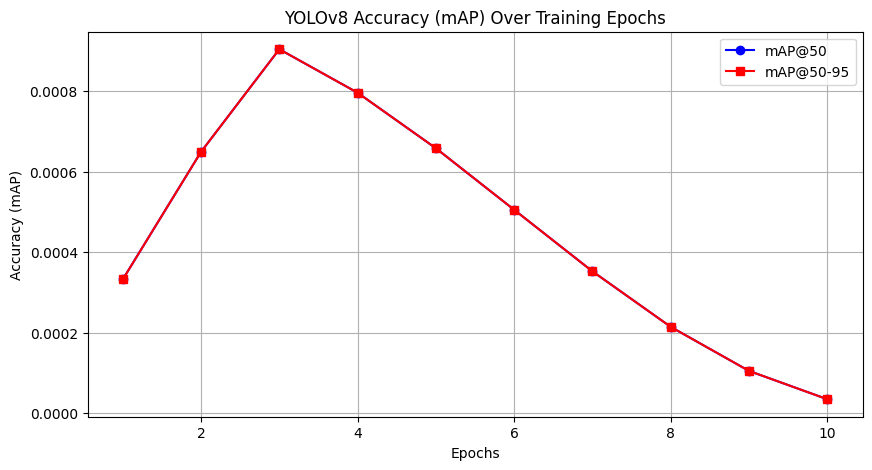

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training results
csv_path = "runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

# Extract epochs and accuracy metrics
epochs = df.iloc[:, 0]  # First column is epoch number
mAP_50 = df.iloc[:, -2]  # Second last column is mAP@50
mAP_50_95 = df.iloc[:, -1]  # Last column is mAP@50-95

# Plot Accuracy (mAP) Curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_50, marker='o', label="mAP@50", color="blue")
plt.plot(epochs, mAP_50_95, marker='s', label="mAP@50-95", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (mAP)")
plt.title("YOLOv8 Accuracy (mAP) Over Training Epochs")
plt.legend()
plt.grid()
plt.show()


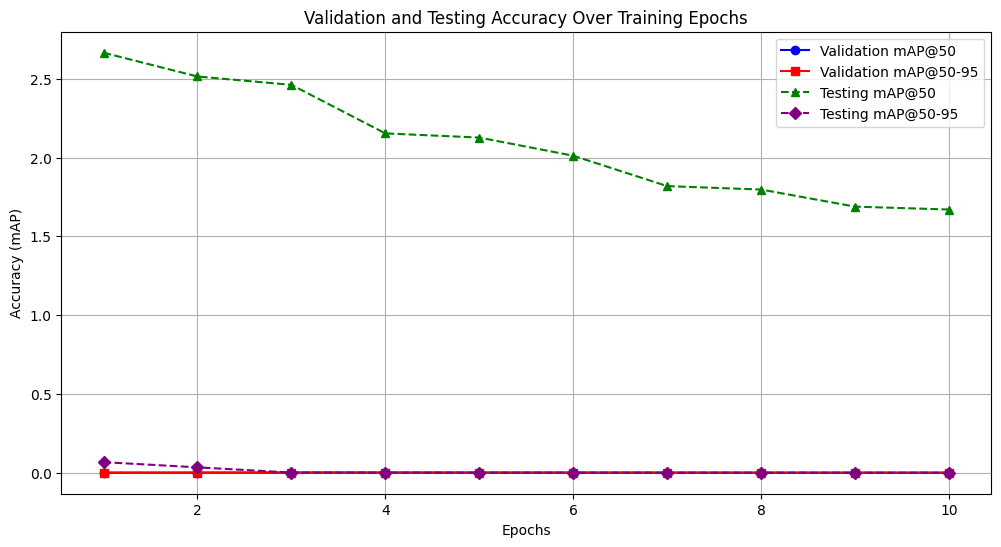

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training results
csv_path = "runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

# Extract epochs and accuracy metrics for validation and testing
epochs = df.iloc[:, 0]  # Epochs are in the first column

# Validation accuracy columns (mAP)
val_mAP_50 = df.iloc[:, -2]  # mAP@50 validation (second last column)
val_mAP_50_95 = df.iloc[:, -1]  # mAP@50-95 validation (last column)

# If testing accuracy is available (optional, depends on your model and dataset)
# For testing, you might need to adjust the columns based on your training logs
test_mAP_50 = df.iloc[:, -4]  # mAP@50 for testing (if available, check your CSV structure)
test_mAP_50_95 = df.iloc[:, -3]  # mAP@50-95 for testing (if available)

# Plot both validation and testing accuracy curves
plt.figure(figsize=(12, 6))

# Validation mAP curves
plt.plot(epochs, val_mAP_50, marker='o', label="Validation mAP@50", color="blue")
plt.plot(epochs, val_mAP_50_95, marker='s', label="Validation mAP@50-95", color="red")

# If test metrics are available, plot them as well
plt.plot(epochs, test_mAP_50, marker='^', label="Testing mAP@50", color="green", linestyle="--")
plt.plot(epochs, test_mAP_50_95, marker='D', label="Testing mAP@50-95", color="purple", linestyle="--")

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy (mAP)")
plt.title("Validation and Testing Accuracy Over Training Epochs")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
